In [2]:
from NumPlateVision.number_plate_reader import NumberPlateReader
from PIL import Image
import matplotlib.pyplot as plt
import os

/Users/elliottcooper/Desktop/Number-Plate-Recognition/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
number_plate_reader = NumberPlateReader()

/Users/elliottcooper/Desktop/Number-Plate-Recognition/venv/lib/python3.11/site-packages/transformers/models/yolos/feature_extraction_yolos.py:38: FutureWarning: The class YolosFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use YolosImageProcessor instead.
  warnings.warn(
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
/Users/elliottcooper/Desktop/Number-Plate-Recognition/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


../number_plate_code/model/character_recognition_model.h5


## Load example data

In [4]:
directory = 'example_data'
files = os.listdir(directory)
image_extensions = ('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')
image_files = [os.path.join(directory, file) for file in files if file.lower().endswith(image_extensions)]
number_of_examples = len(image_files)

## Read plate function

This is how you can typically call the functions.

Note that not passing True into `read_number_plate` will just return the plate reading

In [5]:
def read_plate(image_path):
    """
    Call module functions to read the plate
    
    Parameters:
    image_path (str): Path to image with plate in
    """

    image = Image.open(image_path)
    number_plate = number_plate_reader.get_number_plate(image)
    plate_reading, seg_number_plate, cntr_plate = number_plate_reader.read_number_plate(number_plate, True)
    return image, number_plate, seg_number_plate, cntr_plate, plate_reading


## Output process and reading from each example

The purpose of this is to objectively see how accurate the recognition program is.

In [6]:
def display_process(image, title, axes, i, gray=False):
    """
    Show an image on a given axes with title
    
    Parameters:
    image (np.ndarray): Image to display
    title (str): Title of the plot 
    axes (np.ndarray): Axes of all the plots
    i (int): Index of the axes to plot onto
    """
    
    if gray:
        axes[i].imshow(image, cmap='gray')
    else:
        axes[i].imshow(image)

    axes[i].set_title(title)
    axes[i].set_xticklabels([])
    axes[i].set_yticklabels([])

`post_process` is deprecated and will be removed in v5 of Transformers, please use `post_process_object_detection` instead, with `threshold=0.` for equivalent results.


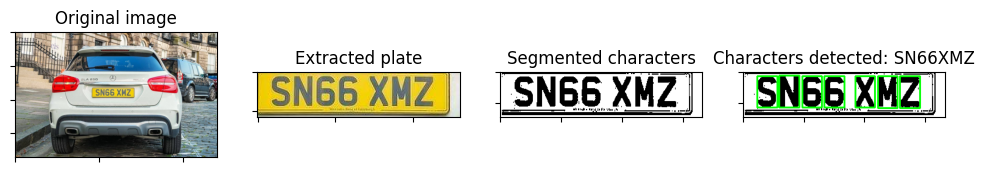

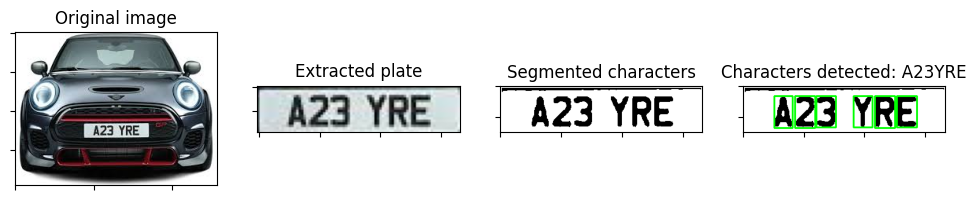

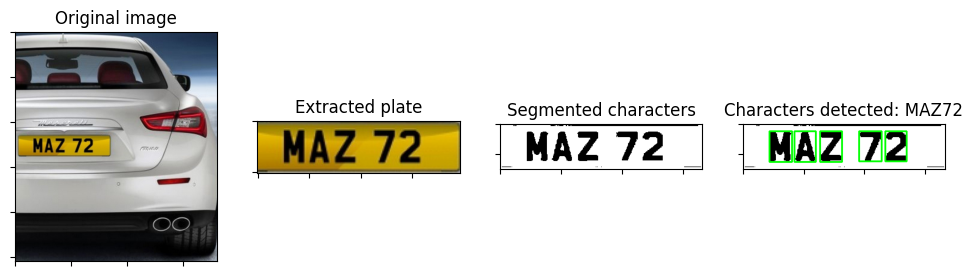

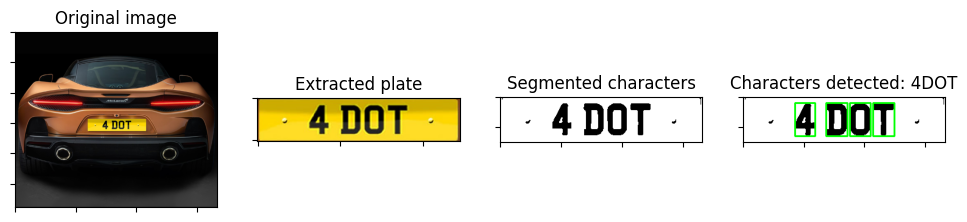

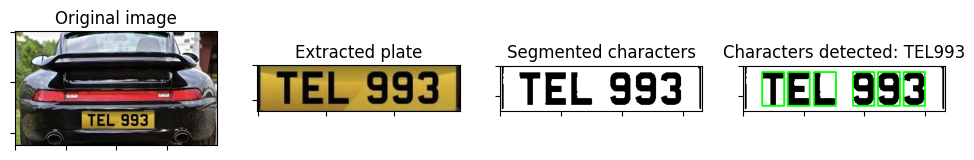

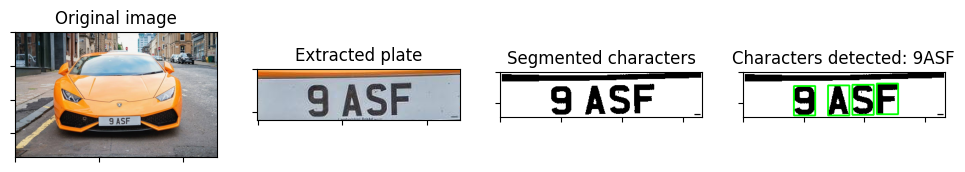

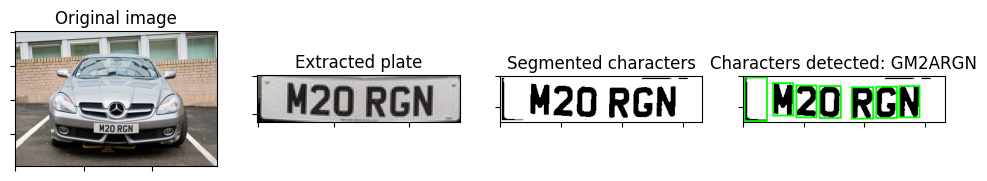

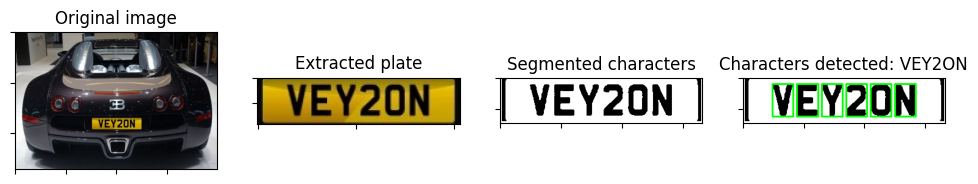

In [7]:
# For each example, display the process
for path in image_files:
    original, plate, seg_plate, cntr_plate, plate_reading = read_plate(path)
    _, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,8))

    display_process(original, "Original image", axes, 0)
    display_process(plate, "Extracted plate", axes, 1)
    display_process(seg_plate, "Segmented characters", axes, 2, True)
    display_process(cntr_plate, f"Characters detected: {plate_reading}", axes, 3)